<a href="https://colab.research.google.com/github/JkRoyal0311/AI-FakeNews-Disaster-Detection/blob/main/Week2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

# Load your dataset
with open("fake_real_news_sample.csv", "r", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline())
# First few rows
print(df.head())

# Dataset shape
print("Shape:", df.shape)

# Data types & missing values
print(df.info())

# Label distribution
print(df['label'].value_counts())


text,label

"Flood in Assam, NDRF teams deployed to assist people",real

Cyclone warning issued by IMD for Odisha coast,real

Breaking: Government announces relief package for Kerala floods,real

Fake donation link circulating on WhatsApp for Bihar flood victims,real

                                                text label
0  Flood in Assam, NDRF teams deployed to assist ...  real
1     Cyclone warning issued by IMD for Odisha coast  real
2  Breaking: Government announces relief package ...  real
3  Fake donation link circulating on WhatsApp for...  real
4  Earthquake tremors felt in Delhi, no damage re...  real
Shape: (50, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
 1   label   50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
None
label
real    25
fake    25
Name: count, dtype: int64


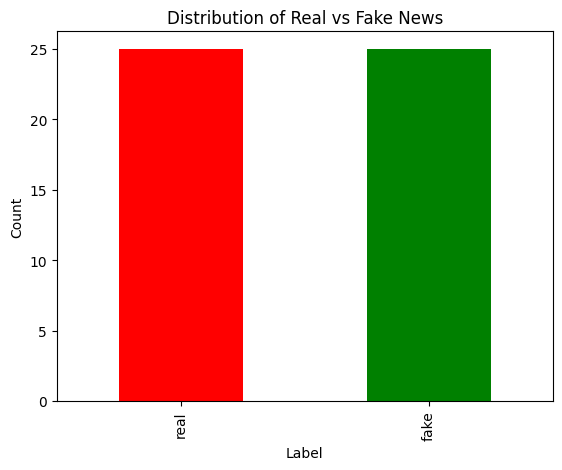

In [33]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


label
fake    50.92
real    55.04
Name: text_length, dtype: float64


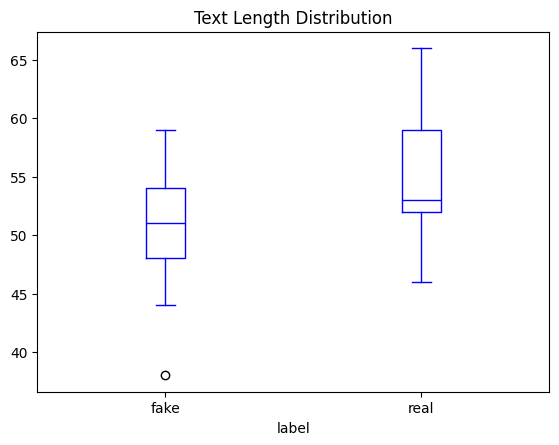

In [34]:
df['text_length'] = df['text'].apply(len)

# Average text length
print(df.groupby('label')['text_length'].mean())

# Boxplot
df.boxplot(column='text_length', by='label', grid=False, color='blue')
plt.title("Text Length Distribution")
plt.suptitle("")
plt.show()


In [35]:
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenize words
fake_words = " ".join(df[df['label']=="fake"]['text']).split()
real_words = " ".join(df[df['label']=="real"]['text']).split()

print("Top 10 words in Fake News:")
print(Counter(fake_words).most_common(10))

print("\nTop 10 words in Real News:")
print(Counter(real_words).most_common(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 10 words in Fake News:
[('in', 10), ('Fake', 8), ('cyclone', 4), ('to', 4), ('after', 3), ('floods', 3), ('Fake:', 3), ('for', 3), ('viral', 2), ('River', 2)]

Top 10 words in Real News:
[('in', 12), ('for', 6), ('Fake', 5), ('to', 4), ('on', 4), ('cyclone', 4), ('people', 3), ('Odisha', 3), ('relief', 3), ('floods', 3)]


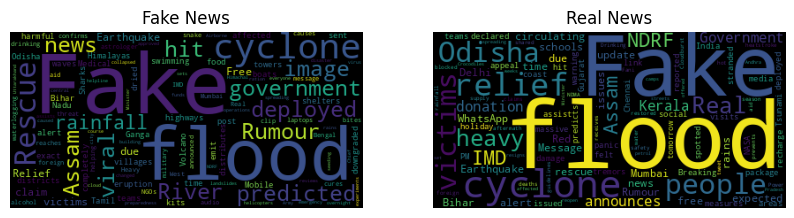

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_text = " ".join(df[df['label']=="fake"]['text'])
real_text = " ".join(df[df['label']=="real"]['text'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud().generate(fake_text))
plt.title("Fake News")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud().generate(real_text))
plt.title("Real News")
plt.axis("off")
plt.show()
